# Importing Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as py
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


import seaborn as sb

# Importing Dataset


In [3]:
dt=pd.read_csv("C:/Users/Arun/Documents/Kollywood Box Office.csv")
dt.head()


,Release Year,Title,Director,Genre,Rating,Budget in Crores,Box Office Collection in crores,Centres,Verdict
0,2011,Venghai,Hari,drama,4.7,10.0,20.0,150,hit
1,2011,Deiva Thirumagal,A. L. Vijay,drama,8.1,8.0,65.0,300,blockbuster
2,2011,Kanchana,Raghava Lawrence,comedy horror,6.6,12.0,50.0,200,blockbuster
3,2011,Karungali,Kalanjiyam,drama,5.5,1.0,0.5,25,flop
4,2011,Veppam,Anjana Ali Khan,drama,4.8,1.0,5.0,85,flop


Grouping the movies which collected more than 250 crores in box office

In [4]:
a = dt[dt['Box Office Collection in crores'] >= 250].apply(list)
a

,Release Year,Title,Director,Genre,Rating,Budget in Crores,Box Office Collection in crores,Centres,Verdict
211,2015,I,Shankar,romantic thriller,7.3,100.0,260.0,500,blockbuster
253,2015,Baahubali: The Beginning,S. S. Rajamouli,epic / history,7.9,150.0,650.0,600,blockbuster
320,2016,Kabali,Pa. Ranjith,action drama,6.5,115.0,297.0,600,blockbuster
371,2017,Baahubali: The Conclusion,S. S. Rajamouli,fantasy,8.1,450.0,1810.0,1700,All time blockbuster
404,2017,Mersal,Atlee,action thriller,7.6,115.0,275.0,500,blockbuster


Grouping the movies directed by the director Hari

In [5]:
dt.groupby('Director').get_group('Hari').apply(list)

,Release Year,Title,Director,Genre,Rating,Budget in Crores,Box Office Collection in crores,Centres,Verdict
0,2011,Venghai,Hari,drama,4.7,10.0,20.0,150,hit
102,2013,Singam II,Hari,action-masala,6.3,35.0,135.0,150,blockbuster
195,2014,Poojai,Hari,action-masala,5.8,25.0,45.0,150,hit
354,2017,Si3,Hari,action masala,6.5,75.0,135.0,500,hit


# Understanding the dataset

In [6]:
dt.describe()

,Release Year,Rating,Budget in Crores,Box Office Collection in crores,Centres
count,416.000000,416.000000,416.000000,416.000000,416.000000
mean,2014.418269,5.950000,17.647837,35.603966,204.747596
std,1.816405,1.102855,30.215218,100.850714,140.422328
min,2011.000000,3.000000,0.500000,0.500000,15.000000
25%,2013.000000,4.975000,5.000000,5.000000,100.000000
50%,2014.000000,6.000000,12.000000,17.500000,200.000000
75%,2016.000000,6.600000,19.250000,35.000000,250.000000
max,2017.000000,8.600000,450.000000,1810.000000,1700.000000


# Data  Preprocessing

In [7]:
dt.isnull()

,Release Year,Title,Director,Genre,Rating,Budget in Crores,Box Office Collection in crores,Centres,Verdict
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
411,False,False,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False,False,False
413,False,False,False,False,False,False,False,False,False
414,False,False,False,False,False,False,False,False,False


# Simple Linear Regression

In [8]:
ab= {'x1':dt["Rating"],'x2':dt["Budget in Crores"],'x3':dt['Centres'],'y':dt["Box Office Collection in crores"]}
df=pd.DataFrame(ab)
df

,x1,x2,x3,y
0,4.7,10.0,150,20.0
1,8.1,8.0,300,65.0
2,6.6,12.0,200,50.0
3,5.5,1.0,25,0.5
4,4.8,1.0,85,5.0
...,...,...,...,...
411,5.5,15.0,300,25.0
412,4.8,7.0,100,15.0
413,8.5,5.0,250,15.0
414,6.1,12.0,100,1.0


In [9]:
def mean(data):
        return (sum(data) / len(data))

def Prediction(x, y, x1, x2, x3):
        arx = np.array(x)
        #print(arx)
        artx = arx.T
        ary = np.array(y)
        fst = np.linalg.inv(np.dot(artx, arx))
        sec = np.dot(artx, ary)
        res = np.dot(fst, sec)
        b0 = mean(y) - (mean(x1) * res[0]) - (mean(x2) * res[1]) - (mean(x3) * res[2])
        print("Regression Equation: Y = ",b0,"+",res[0],"x1 +",res[1],"x2 +",res[2],"x3")
        y_predict=[]
        ss_total=[]
        ss_res=[]
        for i in range(len(x1)):
            y_predict.append(b0 + res[0]*x1[i] + res[1]*x2[i] + res[2]*x3[i]) 
            ss_total.append((y[i] - mean(y)) ** 2)
            ss_res.append((y[i] - y_predict[i]) ** 2)
        sss_res=sum(ss_res)
        sss_total=sum(ss_total)
        r2 = 1 - (sss_res/sss_total)
        print('R2 Score',r2)


In [10]:
Prediction(df[['x1','x2','x3']],df['y'],df['x1'],df['x2'],df['x3'])


Regression Equation: Y =  -2.144077841979744 + -3.6663084133203374 x1 + 2.839016307363748 x2 + 0.046203636588237174 x3
R2 Score 0.8078053536441347


# Data Visualisation

<AxesSubplot:xlabel='Rating', ylabel='Count'>

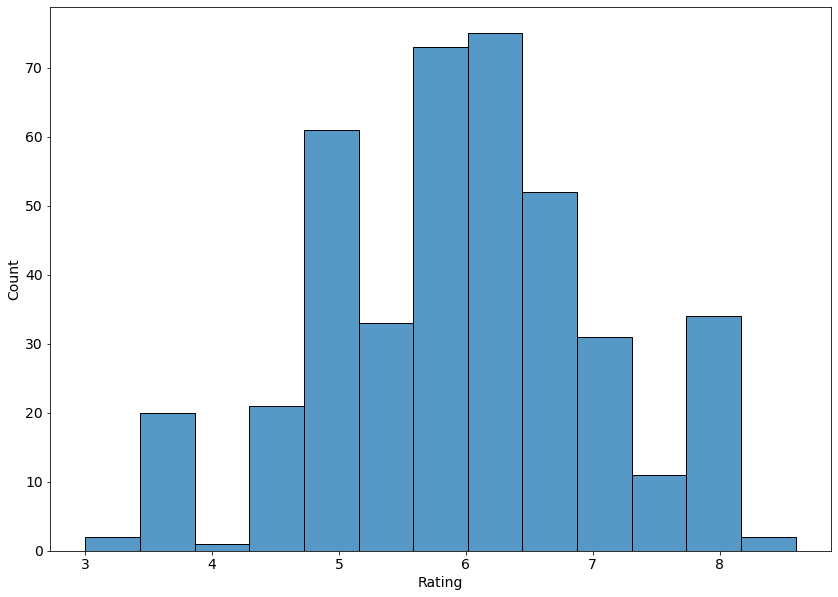

In [11]:
plt.rcParams["figure.figsize"] = [14, 10]
plt.rcParams.update({'font.size': 14})
sb.histplot(dt['Rating'])

(0.0, 500.0)

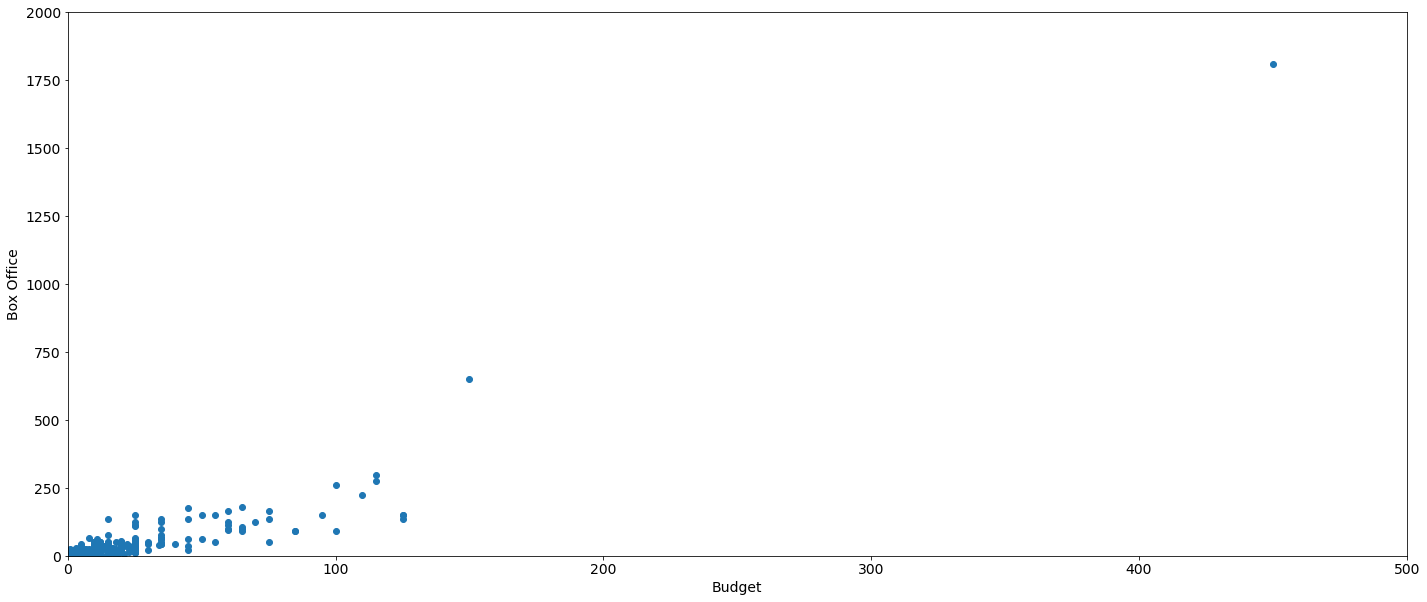

In [12]:
x = dt['Budget in Crores']
y = dt['Box Office Collection in crores']
plt.rcParams["figure.figsize"] = [24, 10]
plt.scatter(x,y)
plt.xlabel("Budget")
plt.ylabel("Box Office")
plt.ylim(0,2000)
plt.xlim(0,500)

In [13]:
dt.corr()

,Release Year,Rating,Budget in Crores,Box Office Collection in crores,Centres
Release Year,1.000000,-0.018043,0.099149,0.098737,0.160073
Rating,-0.018043,1.000000,0.124233,0.187274,0.104479
Budget in Crores,0.099149,0.124233,1.000000,0.900154,0.654542
Box Office Collection in crores,0.098737,0.187274,0.900154,1.000000,0.647957
Centres,0.160073,0.104479,0.654542,0.647957,1.000000


# Traning the dataset and mining

In [14]:
X_train, X_test, y_train, y_test = train_test_split(dt['Budget in Crores'].to_numpy(),dt['Box Office Collection in crores'].to_numpy(),test_size = 0.25,random_state=5)

linear_reg = LinearRegression()
decision_tree = tree.DecisionTreeRegressor()

linear_reg.fit(X_train.reshape(-1,1),y_train)
decision_tree = tree.DecisionTreeRegressor()
linear_reg.fit(X_train.reshape(-1,1),y_train)
decision_tree = decision_tree.fit(X_train.reshape(-1,1),y_train)
linreg_heights = linear_reg.predict(X_test.reshape(-1,1))
d_tree_heights = decision_tree.predict(X_test.reshape(-1,1))
df_predict = pd.DataFrame({'Budget':X_test,'Box_office':y_test,'Lin Reg Predicted Heights ':linreg_heights,'Decision Tree Predicted Height':d_tree_heights})
df_predict

,Budget,Box_office,Lin Reg Predicted Heights,Decision Tree Predicted Height
0,2.0,4.0,-14.179343,8.473684
1,25.0,65.0,58.466511,37.782609
2,10.0,10.0,11.088780,28.611111
3,25.0,15.0,58.466511,37.782609
4,12.0,1.0,17.405811,19.032258
...,...,...,...,...
99,7.0,15.0,1.613234,14.750000
100,11.0,25.0,14.247295,16.176471
101,13.0,35.0,20.564326,20.333333
102,2.0,1.0,-14.179343,8.473684


In [15]:
num = dt.describe(include=['int','float']).columns

<AxesSubplot:title={'center':'Heat Map'}>

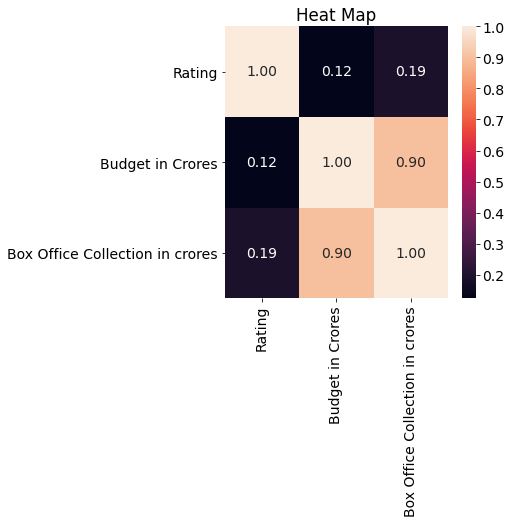

In [16]:
py.figure(figsize = (5,5))
py.title("Heat Map")
sb.heatmap(dt[num].corr(),annot = True,fmt = '.2f')

In [17]:
dt["Verdict"].value_counts()

hit                     210
flop                    168
blockbuster              37
All time blockbuster      1
Name: Verdict, dtype: int64

In [18]:
data1 = dt.dropna()
data1.head()

,Release Year,Title,Director,Genre,Rating,Budget in Crores,Box Office Collection in crores,Centres,Verdict
0,2011,Venghai,Hari,drama,4.7,10.0,20.0,150,hit
1,2011,Deiva Thirumagal,A. L. Vijay,drama,8.1,8.0,65.0,300,blockbuster
2,2011,Kanchana,Raghava Lawrence,comedy horror,6.6,12.0,50.0,200,blockbuster
3,2011,Karungali,Kalanjiyam,drama,5.5,1.0,0.5,25,flop
4,2011,Veppam,Anjana Ali Khan,drama,4.8,1.0,5.0,85,flop


In [19]:
x1 = data1.drop('Verdict',axis = 1)
x2 = x1.drop('Title',axis = 1)
x3 = x2.drop('Director',axis = 1)
x4 = x3.drop('Genre',axis = 1)
x5 = x4.drop('Release Year',axis = 1)
x  = x5.drop('Centres',axis = 1)
x.dropna()
x.head()

,Rating,Budget in Crores,Box Office Collection in crores
0,4.7,10.0,20.0
1,8.1,8.0,65.0
2,6.6,12.0,50.0
3,5.5,1.0,0.5
4,4.8,1.0,5.0


In [21]:
y  = data1['Verdict']
y.dropna()
y.head()

0            hit
1    blockbuster
2    blockbuster
3           flop
4           flop
Name: Verdict, dtype: object

In [22]:
# Splitting the dataset into training and test set.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
#feature Scaling   
stx= StandardScaler()    
x_train= stx.fit_transform(x_train)    
x_test= stx.transform(x_test)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((312, 3), (104, 3), (312,), (104,))

In [23]:
#Fitting K-NN classifier to the training set  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)
#Predicting the test set result  
y_pred= classifier.predict(x_test)

              precision    recall  f1-score   support

 blockbuster       0.90      0.69      0.78        13
        flop       0.64      0.68      0.66        34
         hit       0.74      0.75      0.75        57

    accuracy                           0.72       104
   macro avg       0.76      0.71      0.73       104
weighted avg       0.73      0.72      0.72       104



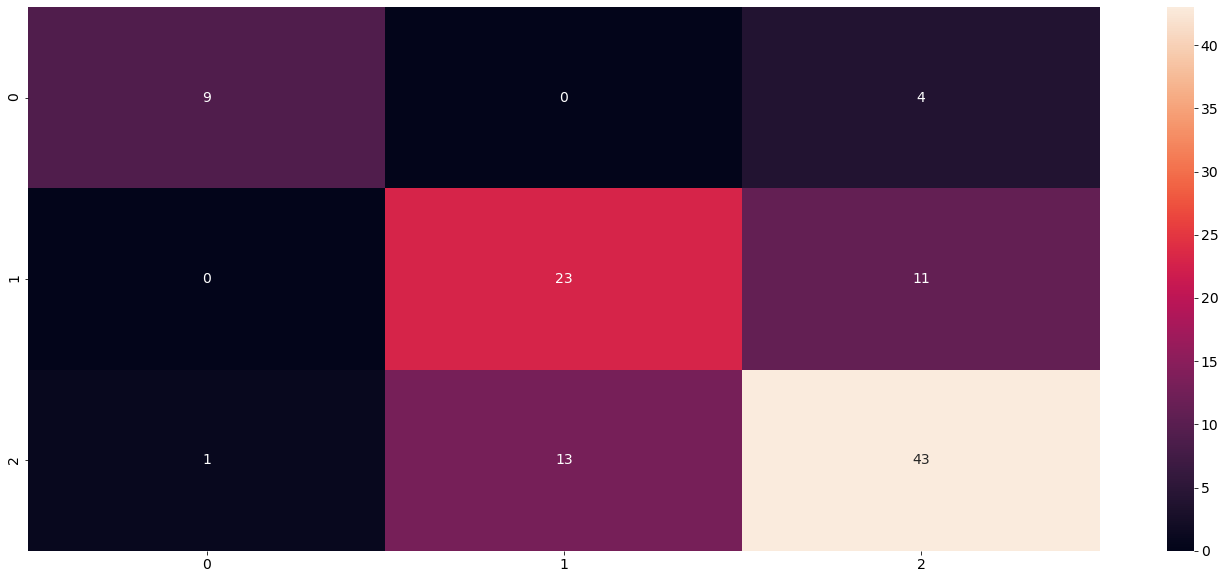

In [25]:
#Creating the Confusion matrix  
cm= confusion_matrix(y_test, y_pred) 
# Seaborn's heatmap to better visualize the confusion matrix
sb.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, y_pred))

In [26]:
# Splitting the dataset into training and test set.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
#feature Scaling   
scaler = MinMaxScaler()   
x_train= scaler.fit_transform(x_train)    
x_test= scaler.transform(x_test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((249, 3), (167, 3), (249,), (167,))

In [30]:
from sklearn import metrics
#NAIVES BAYES CLASSIFIER
#1 GAUSSIAN
gaussian_nb = GaussianNB()
gaussian_nb.fit(x_train, y_train)
gaussian_predict = gaussian_nb.predict(x_test)
print(classification_report(y_test, gaussian_predict))
a = metrics.accuracy_score(y_test, gaussian_predict)*100
print("Gaussian Naive Bayes model accuracy(in %):", a)

                      precision    recall  f1-score   support

All time blockbuster       0.00      0.00      0.00         1
         blockbuster       0.58      0.50      0.54        14
                flop       0.61      0.91      0.73        74
                 hit       0.71      0.41      0.52        78

            accuracy                           0.63       167
           macro avg       0.48      0.45      0.45       167
        weighted avg       0.65      0.63      0.61       167

Gaussian Naive Bayes model accuracy(in %): 63.47305389221557


c:\users\arun\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\arun\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\arun\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

<AxesSubplot:>

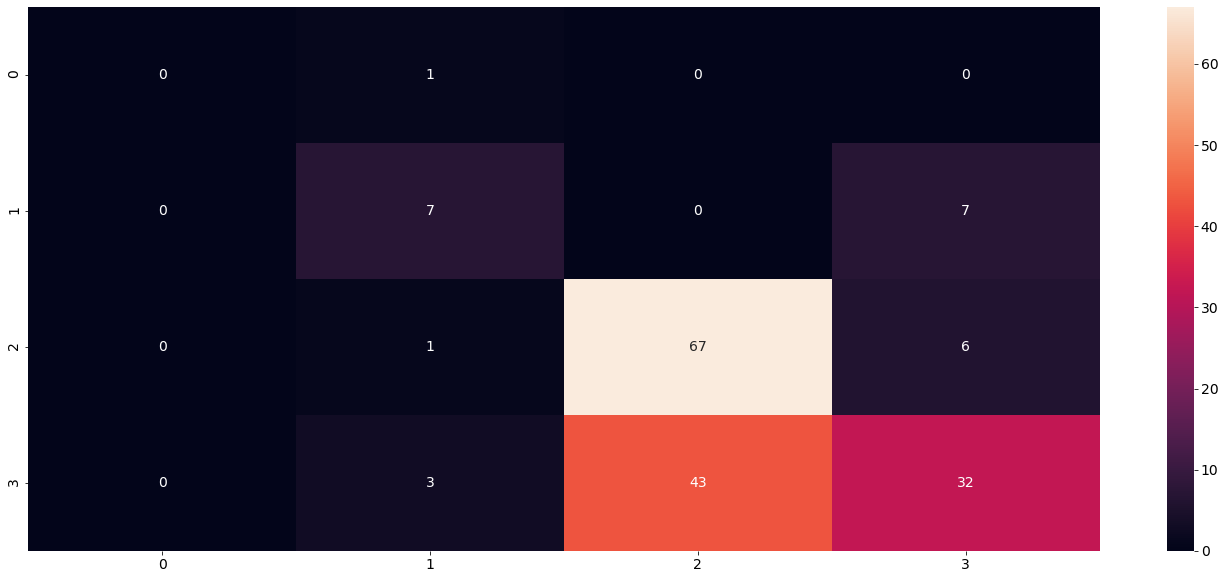

In [29]:
#Creating the Confusion matrix  
cm= confusion_matrix(y_test, gaussian_predict) 
# Seaborn's heatmap to better visualize the confusion matrix
sb.heatmap(cm, annot=True, fmt='d')

In [33]:
#2 BERNOULLI
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(x_train, y_train)
bernoulli_predict = bernoulli_nb.predict(x_test)
print(classification_report(y_test, bernoulli_predict))
b = metrics.accuracy_score(y_test, bernoulli_predict)*100
print("Bernoulli Naive Bayes model accuracy(in %):", b)

                      precision    recall  f1-score   support

All time blockbuster       0.00      0.00      0.00         1
         blockbuster       0.00      0.00      0.00        14
                flop       0.00      0.00      0.00        74
                 hit       0.47      1.00      0.64        78

            accuracy                           0.47       167
           macro avg       0.12      0.25      0.16       167
        weighted avg       0.22      0.47      0.30       167

Bernoulli Naive Bayes model accuracy(in %): 46.706586826347305


c:\users\arun\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\arun\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\arun\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

<AxesSubplot:>

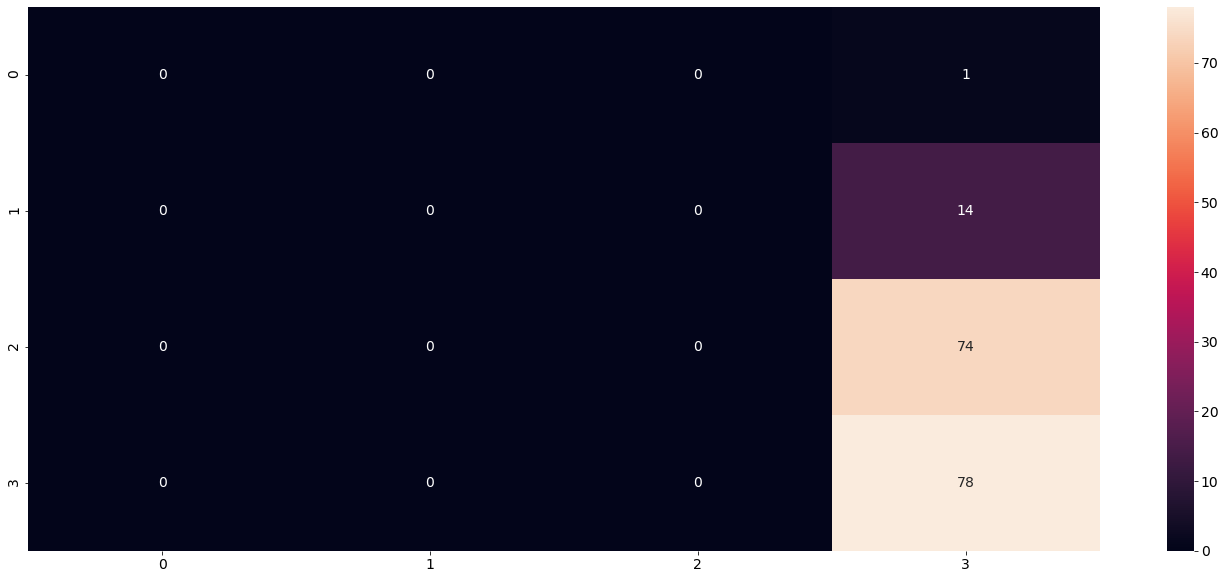

In [35]:
#Creating the Confusion matrix  
cm= confusion_matrix(y_test, bernoulli_predict) 
# Seaborn's heatmap to better visualize the confusion matrix
sb.heatmap(cm, annot=True, fmt='d')